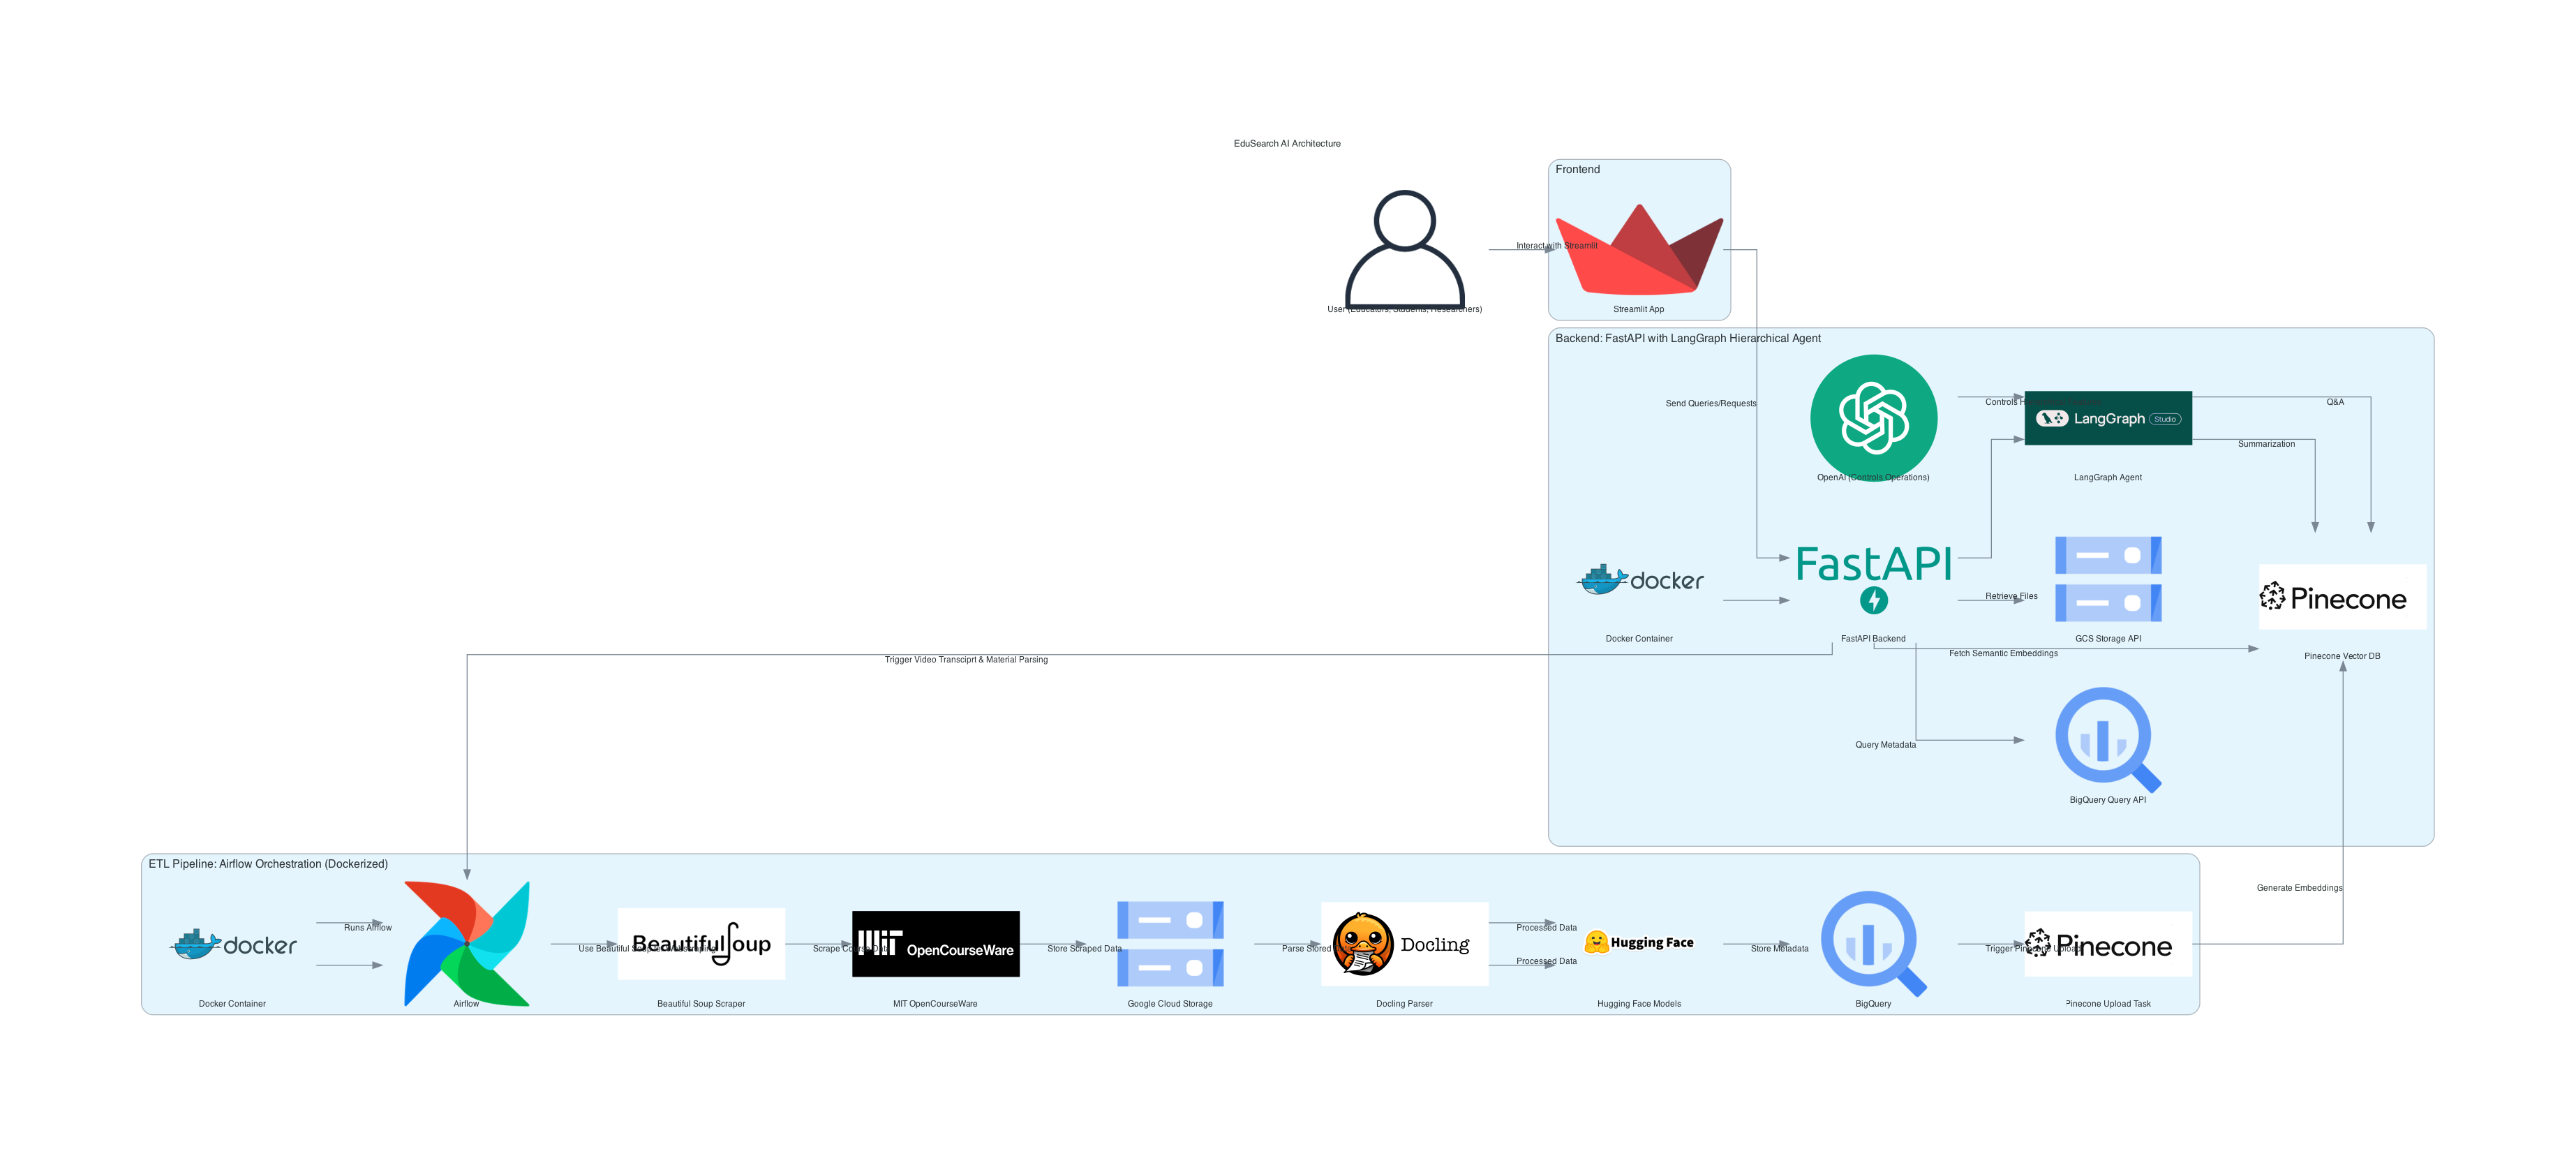

In [84]:
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.storage import GCS
from diagrams.gcp.analytics import BigQuery
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom
from diagrams.onprem.client import User

# Custom logos
streamlit_logo = "streamlit_logo.png"
pinecone_logo = "pinecone_logo.png"
mit_logo = "mit_logo.png"
huggingface_logo = "huggingface_logo.png"
docker_logo = "docker_logo.png"
docling_logo = "docling-logo.png"
beautifulsoup_logo = "beautifulsoup-logo.png"
langraph_logo = "langraph_logo.png"  # Common LangGraph logo
openai_logo = "openai_logo.png"  # OpenAI logo

# Diagram attributes
graph_attr = {
    "fontsize": "10",
    "labelloc": "t",
    "nodesep": "0.5",  # Adjust for compactness
    "ranksep": "1.0",  # Adjust for balance
}


node_attr = {
    "fontsize": "9",
    "width": "2.5",
    "height": "1.5",
}

with Diagram(
    "EduSearch AI Architecture",
    show=False,
    filename="edusearch_ai",
    outformat="png",
    graph_attr=graph_attr,
    node_attr=node_attr,
) as diag:
    # User Interaction Layer
    user = User("User (Educators, Students, Researchers)")

    # Frontend Layer
    with Cluster("Frontend"):
        streamlit = Custom("Streamlit App", streamlit_logo)

    # Backend Layer
    with Cluster("Backend: FastAPI with LangGraph Hierarchical Agent"):
        docker_backend = Custom("Docker Container", docker_logo)
        fastapi = Custom("FastAPI Backend", "fastapi_logo.png")
        langraph = Custom("LangGraph Agent", langraph_logo)
        openai = Custom("OpenAI (Controls Operations)", openai_logo)
        pinecone = Custom("Pinecone Vector DB", pinecone_logo)
        bigquery_api = BigQuery("BigQuery Query API")
        gcs_api = GCS("GCS Storage API")

        # Connections in Backend
        docker_backend >> fastapi
        fastapi >> langraph
        openai >> Edge(xlabel="Controls Hierarchical Features", fontsize="9") >> langraph

        # LangGraph Subtasks
        summarization = "1. Summarization"
        topic_segmentation = "2. Topic Segmentation"
        qna_agent = "3. Q&A"
        research_notes = "4. Research Notes"
        citations = "5. Citations"

        # LangGraph connects to subtasks and Pinecone
        langraph >> Edge(xlabel="Summarization", fontsize="9") >> pinecone
        langraph >> Edge(xlabel="Topic Segmentation", fontsize="9")
        langraph >> Edge(xlabel="Q&A", fontsize="9") >> pinecone
        langraph >> Edge(xlabel="Research Notes", fontsize="9")
        langraph >> Edge(xlabel="Citations", fontsize="9")

    # ETL Pipeline Layer
    with Cluster("ETL Pipeline: Airflow Orchestration (Dockerized)"):
        docker_airflow = Custom("Docker Container", docker_logo)
        airflow = Airflow("Airflow")
        beautifulsoup = Custom("Beautiful Soup Scraper", beautifulsoup_logo)
        mit_ocw_website = Custom("MIT OpenCourseWare", mit_logo)
        docling = Custom("Docling Parser", docling_logo)
        huggingface = Custom("Hugging Face Models", huggingface_logo)
        gcs = GCS("Google Cloud Storage")
        bigquery = BigQuery("BigQuery")
        airflow_pinecone = Custom("Pinecone Upload Task", pinecone_logo)

        docker_airflow >> airflow
        docling >> Edge(xlabel="Processed Data", fontsize="9") >> huggingface

    # Connections
    # User Interaction Flow
    user >> Edge(xlabel="Interact with Streamlit", fontsize="9") >> streamlit
    streamlit >> Edge(xlabel="Send Queries/Requests", fontsize="9") >> fastapi

    # Backend Connections
    fastapi >> Edge(xlabel="Fetch Semantic Embeddings", fontsize="9") >> pinecone
    fastapi >> Edge(xlabel="Query Metadata", fontsize="9") >> bigquery_api
    fastapi >> Edge(xlabel="Retrieve Files", fontsize="9") >> gcs_api

    # Pipeline Flow
    fastapi >> Edge(xlabel="Trigger Video Transciprt & Material Parsing", fontsize="9") >> airflow
    docker_airflow >> Edge(xlabel="Runs Airflow", fontsize="9") >> airflow
    airflow >> Edge(xlabel="Use Beautiful Soup for Webscraping", fontsize="9") >> beautifulsoup
    beautifulsoup >> Edge(xlabel="Scrape Course Data", fontsize="9") >> mit_ocw_website
    mit_ocw_website >> Edge(xlabel="Store Scraped Data", fontsize="9") >> gcs
    gcs >> Edge(xlabel="Parse Stored Data", fontsize="9") >> docling  # Docling added here after GCS
    docling >> Edge(xlabel="Processed Data", fontsize="9") >> huggingface
    huggingface >> Edge(xlabel="Store Metadata", fontsize="9") >> bigquery
    bigquery >> Edge(xlabel="Trigger Pinecone Upload", fontsize="9") >> airflow_pinecone
    airflow_pinecone >> Edge(xlabel="Generate Embeddings", fontsize="9") >> pinecone

diag
